# Sheet 5

In [1]:
import os
import pandas as pd

## 2 Logistic regression: an LLM lie detector

Download the data from https://heibox.uni-heidelberg.de/f/38bd3f2a9b7944248cc2/   
Unzip it and place the lie_detection folder in the folder named `data` to get the following structure:
"data/lie_detection/datasets" and "data/lie_detection/acts".

This is how you can load a dataset of LLM activations. Use a new Datamanager if you want to have a new dataset. Use the same data manager if you want to combine datasets.

In [ ]:
from lie_detection_utils import DataManager

path_to_datasets = "data/lie_detection/datasets"
path_to_acts = "data/lie_detection/acts"

# check if the datasets and activations are available
assert os.path.exists(path_to_datasets), "The path to the datasets does not exist."
assert os.path.exists(path_to_acts), "The path to the activations does not exist."

# these are the different datasets containing true and false factual statements about different topics
dataset_names = ["cities", "neg_cities", "sp_en_trans", "neg_sp_en_trans"]
dataset_name = dataset_names[0] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train, labels_train = dm.get('train') # train set
acts_test, labels_test = dm.get('val')
print(acts_train.shape, labels_train.shape)

In [ ]:
# have a look at the statements that were fed to the LLM to produce the activations:
df = pd.read_csv(f"{path_to_datasets}/{dataset_name}.csv")
print(df.head(10))

## 3 Log-sum-exp and soft(arg)max
### (b)

[0.09003057317038046, 0.24472847105479767, 0.6652409557748219]
[0.09003057317038046, 0.24472847105479764, 0.6652409557748219]
[2.061060046209062e-09, 4.539786860886666e-05, 0.9999546000703311]
(100, 100)
(100, 100)
(100, 100)


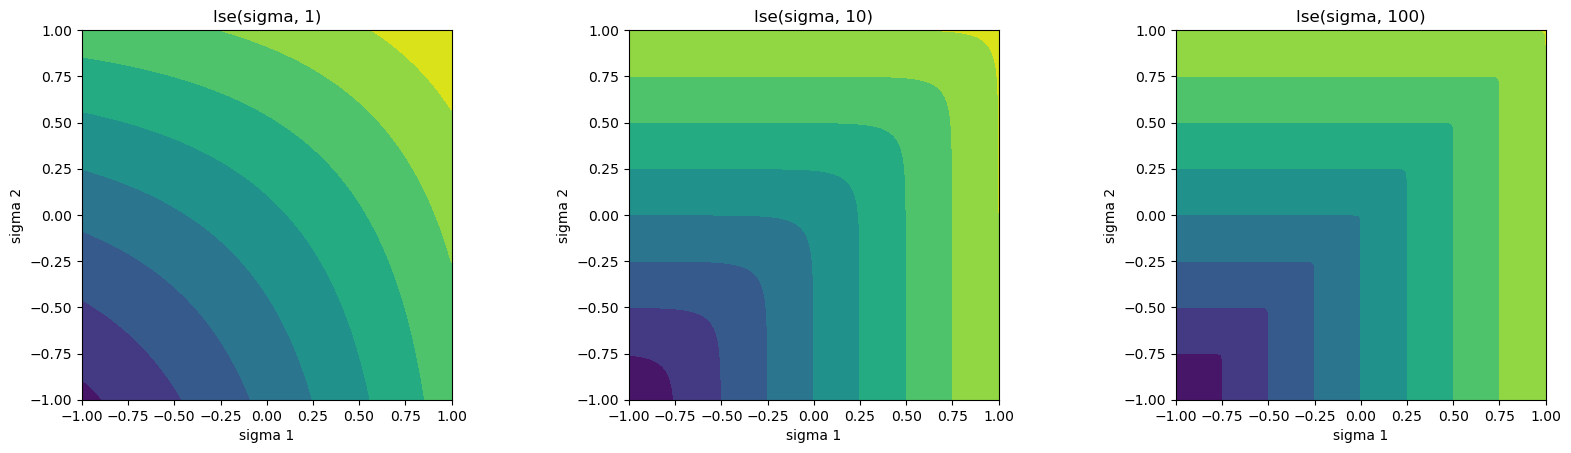

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def softmax(sigma, lam):
    denom = sum([np.exp(lam*s) for s in sigma])
    return [np.exp(lam*s) / denom for s in sigma]

def lse(sigma, lam):
    return np.log(sum([np.exp(lam*s) for s in sigma])) / lam


print(softmax([1, 2, 3], 1))
print(softmax([11, 12, 13], 1))
print(softmax([10, 20, 30], 1))


fig, ax = plt.subplots(1, 3)
s1_grid, s2_grid = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)) 
for i, lam in enumerate([1, 10, 100]):
    lse_val = np.array([lse([s1, s2], lam) for s1, s2 in zip(s1_grid, s2_grid)])

    cs = ax[i].contourf(s1_grid, s2_grid, lse_val)
    ax[i].set_xlabel('sigma 1')
    ax[i].set_ylabel('sigma 2')
    ax[i].set_title(f'lse(sigma, {lam})')

    ax[i].set_aspect('equal', adjustable='box')

fig.set_figwidth(20)
plt.show()

### (c)

## 4 Linear regions of MLPs